<a href="https://colab.research.google.com/github/vedith12/ML-tasks/blob/main/ML_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONSTANT FEATURES**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("/content/parkinsons_disease_data.csv")
print("shape ", df.shape)
# print(df.head())
print("columns with missing values: ", [col for col in df.columns if df[col].isnull().sum()>0])


# df.columns

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(labels=['Diagnosis'],axis=1),
    df['Diagnosis'],
    test_size=0.3,
    random_state=0
)

constant_features = [
    col for col in X_train.select_dtypes(include=[np.number]).columns
    if X_train[col].std() == 0
]
# print(len(constant_features))
print("Constant Features:")
for col in constant_features:
    print(col)

print(X_train.shape)
print(X_test.shape)
X_train.drop(labels=constant_features,axis=1,inplace=True)
X_test.drop(labels=constant_features,axis=1,inplace=True)
print(df.head())
print(X_train.shape)
print(X_test.shape)

shape  (2105, 35)
columns with missing values:  []
Constant Features:
(1473, 34)
(632, 34)
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52       0          0               0  15.454557        0   
4       3062   87       0          0               1  18.616042        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0            5.108241          1.380660     3.893969  ...   
1            6.027648          8.409804     8.513428  ...   
2            2.242135          0.213275     6.498805  ...   
3            5.997788          1.375045     6.715033  ...   
4            9.775243          1.188607     4.657572  ...   

   FunctionalAssessment  Tremor  Rigidity  Bradykinesia  PosturalInstability  \
0    

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/kc_house_data.csv")
print("Shape:", df.shape)

# Check for missing values
print("Columns with missing values:", [col for col in df.columns if df[col].isnull().sum() > 0])

# Split into features and target
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['price', 'id', 'date'], axis=1),
    df['price'],
    test_size=0.3,
    random_state=0
)

# Find constant features
constant_features = [
    col for col in X_train.select_dtypes(include=[np.number]).columns
    if X_train[col].std() == 0
]

print("Constant Features:")
for col in constant_features:
    print(col)

# Shapes before dropping
print("Before dropping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Drop constant features
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

# Sample of dataset and new shapes
print("\nSample data:")
print(df.head())
print("\nAfter dropping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Shape: (21597, 21)
Columns with missing values: []
Constant Features:
Before dropping:
X_train shape: (15117, 18)
X_test shape: (6480, 18)

Sample data:
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8

# **QUASI CONSTANT**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("/content/parkinsons_disease_data.csv")
print("shape ", df.shape)
# print(df.head())
print("columns with missing values: ", [col for col in df.columns if df[col].isnull().sum()>0])

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(labels=['Diagnosis'],axis=1),
    df['Diagnosis'],
    test_size=0.3,
    random_state=0
    )
quasi_constant_feat = []

for feature in X_train.columns:
  predominant = (X_train[feature].value_counts()/float(
      len(X_train))).sort_values(ascending=False).values[0]
  if predominant >= 0.988:
    quasi_constant_feat.append(feature)
print(X_train.shape)
print(X_test.shape)
print("no. of quasi constant features : ", len(quasi_constant_feat))
X_train.drop(labels = quasi_constant_feat,axis=1,inplace=True)
X_test.drop(labels = quasi_constant_feat,axis=1,inplace=True)
print(X_train.shape)
print(X_test.shape)

duplicate = set()
for i in range(0, len(X_train.columns)):
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicate.add(col_2)

print(duplicate, "\nDuplicate:", len(duplicate))

shape  (2105, 35)
columns with missing values:  []
(1473, 34)
(632, 34)
no. of quasi constant features :  1
(1473, 33)
(632, 33)
set() 
Duplicate: 0


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/kc_house_data.csv")
print("Shape:", df.shape)

# Check for missing values
print("Columns with missing values:", [col for col in df.columns if df[col].isnull().sum() > 0])

# Split into features and target
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['price', 'id', 'date'], axis=1),
    df['price'],
    test_size=0.3,
    random_state=0
)

# Identify quasi-constant features
quasi_constant_feat = []
for feature in X_train.columns:
    predominant = (X_train[feature].value_counts() / float(len(X_train))).sort_values(ascending=False).values[0]
    if predominant >= 0.988:
        quasi_constant_feat.append(feature)

# Print results
print("Before dropping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Number of quasi-constant features:", len(quasi_constant_feat))

# Drop quasi-constant features
X_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)

# After drop
print("After dropping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Shape: (21597, 21)
Columns with missing values: []
Before dropping:
X_train shape: (15117, 18)
X_test shape: (6480, 18)
Number of quasi-constant features: 1
After dropping:
X_train shape: (15117, 17)
X_test shape: (6480, 17)


In [6]:
duplicate = set()
for i in range(0, len(X_train.columns)):
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicate.add(col_2)

print(duplicate, "\nDuplicate:", len(duplicate))

set() 
Duplicate: 0


# **CORRELATION**

Shape:  (2105, 35)
Columns with missing values: []




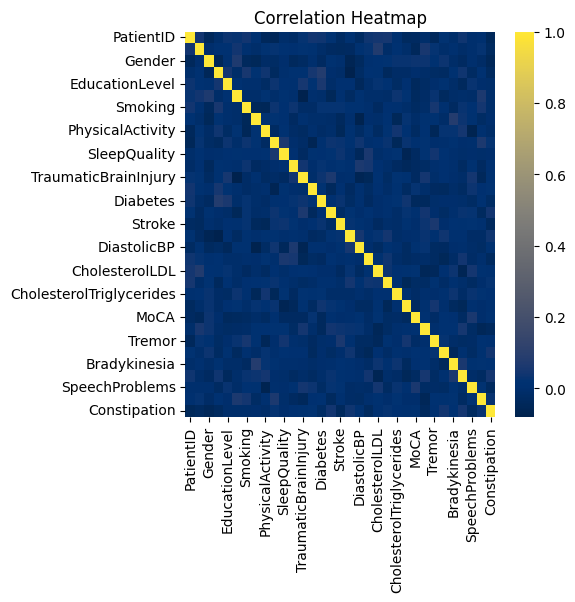



set() 
Correlated features: 0
New shape of X_train and X_test: (1473, 34) (632, 34)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("/content/parkinsons_disease_data.csv")
print("Shape: ", df.shape)
print("Columns with missing values:", [col for col in df.columns if df[col].isnull().sum() > 0])

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Diagnosis'], axis=1),
    df['Diagnosis'],
    test_size=0.3,
    random_state=0
)
print('\n')
X_train_numeric = X_train.select_dtypes(include=np.number)

corrmat = X_train_numeric.corr()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.heatmap(corrmat, cmap='cividis')
plt.title("Correlation Heatmap")
plt.show()

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
print('\n')
corr_features = correlation(X_train_numeric, 0.9)
correlated_features = set(corr_features)
print(correlated_features, "\nCorrelated features:", len(correlated_features))

X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)
print("New shape of X_train and X_test:", X_train.shape, X_test.shape)


Shape:  (21597, 21)
Columns with missing values: []


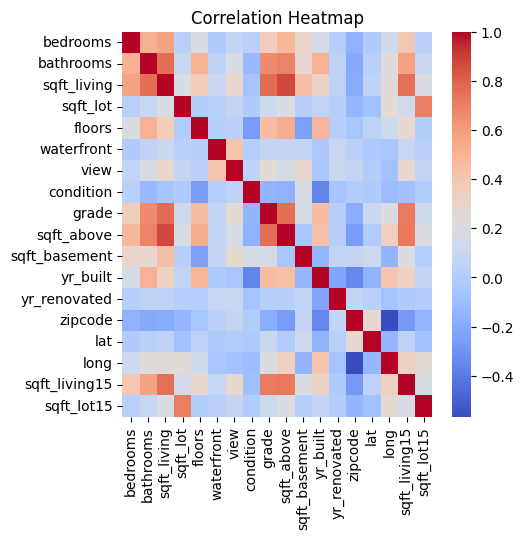


Highly Correlated Features: {'sqft_above', 'sqft_living', 'grade'}
Number of correlated features: 3
New shape of X_train and X_test: (15117, 15) (6480, 15)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("kc_house_data.csv")
print("Shape: ", df.shape)

# Check for missing values
print("Columns with missing values:", [col for col in df.columns if df[col].isnull().sum() > 0])

# Split into features and target
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['price', 'id', 'date'], axis=1),  # drop target + non-useful cols
    df['price'],
    test_size=0.3,
    random_state=0
)

# Only numeric columns
X_train_numeric = X_train.select_dtypes(include=np.number)

# Correlation matrix heatmap
corrmat = X_train_numeric.corr()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.heatmap(corrmat, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Identify correlated features above a threshold
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train_numeric, 0.75)
correlated_features = set(corr_features)

print("\nHighly Correlated Features:", correlated_features)
print("Number of correlated features:", len(correlated_features))

# Drop the correlated features
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

print("New shape of X_train and X_test:", X_train.shape, X_test.shape)


# **MUTUAL INFORMATION**

Shape:  (2105, 35)
Columns with missing values: []
Non-numeric columns: Index(['DoctorInCharge'], dtype='object')


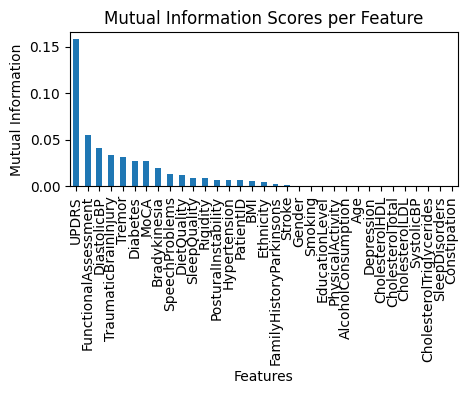

Top 10 features based on Mutual Information:
 Index(['Age', 'Ethnicity', 'DietQuality', 'UPDRS', 'MoCA',
       'FunctionalAssessment', 'Tremor', 'Bradykinesia', 'SpeechProblems',
       'Constipation'],
      dtype='object') 
Mutual Information: 10
(1473, 10) (632, 10)


In [9]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv("/content/parkinsons_disease_data.csv")

print("Shape: ", df.shape)
print("Columns with missing values:", [col for col in df.columns if df[col].isnull().sum() > 0])
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Diagnosis'], axis=1),
    df['Diagnosis'],
    test_size=0.3,
    random_state=0
)
X_train_filled = X_train.fillna(0)

non_numeric_cols = X_train_filled.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

X_train_filled_numeric = X_train_filled.drop(columns=non_numeric_cols)


mi = mutual_info_regression(X_train_filled_numeric, y_train)

mi_series = pd.Series(mi)
mi_series.index = X_train_filled_numeric.columns

mi_sorted = mi_series.sort_values(ascending=False)

plt.figure(figsize=(5, 2))
mi_sorted.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(X_train_filled_numeric, y_train)

top_mi_features = X_train_filled_numeric.columns[selector.get_support()]
print("Top 10 features based on Mutual Information:\n", top_mi_features, "\nMutual Information: 10")

X_train = X_train[top_mi_features]
X_test = X_test[top_mi_features]
print(X_train.shape, X_test.shape)

Shape:  (21597, 21)
Columns with missing values: []
Non-numeric columns: Index([], dtype='object')


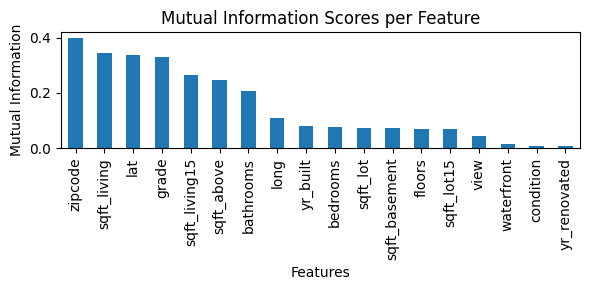

Top 10 features based on Mutual Information:
 Index(['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')
New shapes after feature selection: (15117, 10) (6480, 10)


In [10]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("kc_house_data.csv")
print("Shape: ", df.shape)

# Check for missing values
print("Columns with missing values:", [col for col in df.columns if df[col].isnull().sum() > 0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['price', 'id', 'date'], axis=1),  # Dropping target + non-informative columns
    df['price'],
    test_size=0.3,
    random_state=0
)

# Fill missing values if any (though this dataset doesn't have nulls)
X_train_filled = X_train.fillna(0)

# Remove non-numeric columns (precautionary)
non_numeric_cols = X_train_filled.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)

X_train_numeric = X_train_filled.drop(columns=non_numeric_cols)

# Compute mutual information
mi = mutual_info_regression(X_train_numeric, y_train)

# Convert to Series for plotting
mi_series = pd.Series(mi, index=X_train_numeric.columns).sort_values(ascending=False)

# Plot top mutual information scores
plt.figure(figsize=(6, 3))
mi_series.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

# Select top 10 features
selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(X_train_numeric, y_train)

top_mi_features = X_train_numeric.columns[selector.get_support()]
print("Top 10 features based on Mutual Information:\n", top_mi_features)

# Keep only top 10 features in train/test sets
X_train = X_train[top_mi_features]
X_test = X_test[top_mi_features]

print("New shapes after feature selection:", X_train.shape, X_test.shape)
